In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [4]:
df = pd.read_csv('/content/sample_data/traffic (2).csv')
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


In [6]:
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000
mean,16.000000,68.696573,14.917339,15.279570,15.324933,114.218414
std,8.945775,45.850693,12.847518,14.341986,10.603833,60.190627
min,1.000000,6.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,19.000000,5.000000,1.000000,6.000000,55.000000
50%,16.000000,64.000000,12.000000,12.000000,14.000000,109.000000
75%,24.000000,107.000000,22.000000,25.000000,23.000000,164.000000
max,31.000000,180.000000,70.000000,50.000000,40.000000,279.000000


In [7]:
df.columns

Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='object')

### 1. Vehicle Distribution Analysis

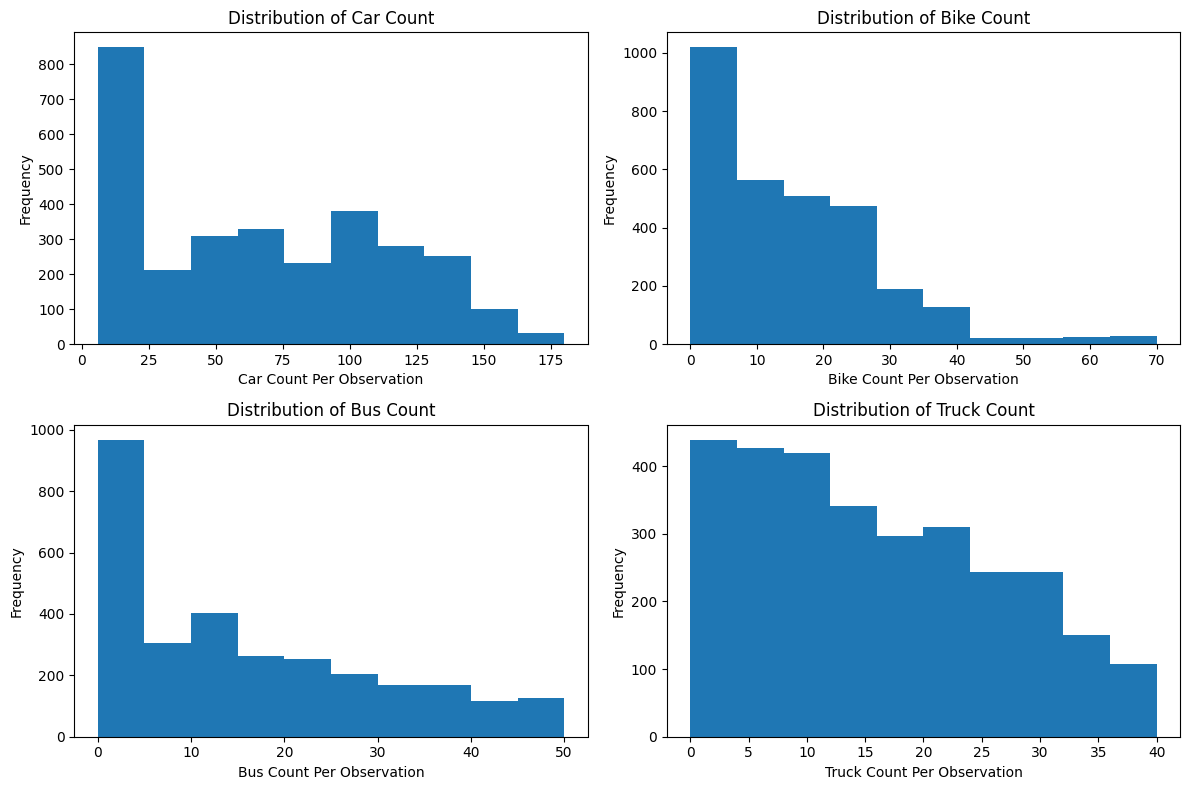

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))


axes[0, 0].hist(df['CarCount'])
axes[0, 0].set_xlabel('Car Count Per Observation')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Car Count')

axes[0, 1].hist(df['BikeCount'])
axes[0, 1].set_xlabel('Bike Count Per Observation')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Bike Count')

axes[1, 0].hist(df['BusCount'])
axes[1, 0].set_xlabel('Bus Count Per Observation')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Bus Count')

axes[1, 1].hist(df['TruckCount'])
axes[1, 1].set_xlabel('Truck Count Per Observation')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Truck Count')

plt.tight_layout()

plt.show()

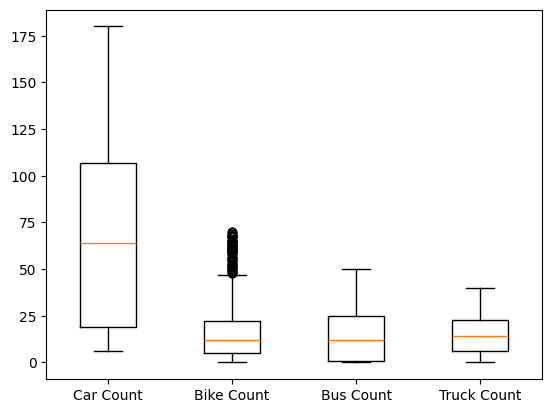

In [9]:
plt.boxplot([df['CarCount'], df['BikeCount'], df['BusCount'], df['TruckCount']])
plt.xticks([1, 2, 3, 4], ['Car Count', 'Bike Count', 'Bus Count', 'Truck Count'])
print()

### 2. Traffic Situation Distribution

<Axes: title={'center': 'Distribution by Traffic Situation'}, ylabel='Traffic Situation'>

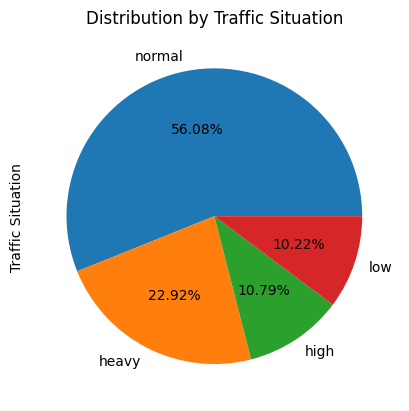

In [10]:
tf = df['Traffic Situation'].value_counts()
tf.plot(kind = 'pie',label = 'Traffic Situation', autopct="%1.2f%%", title = "Distribution by Traffic Situation")

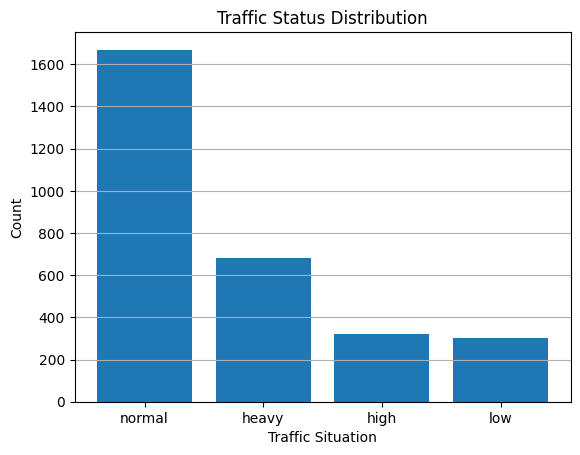

In [11]:
plt.bar(df['Traffic Situation'].value_counts().index, df['Traffic Situation'].value_counts())
plt.xlabel('Traffic Situation')
plt.ylabel('Count')
plt.title('Traffic Status Distribution')
plt.grid(axis='y')

### 3. Vehicle Count Variation by Day of the Week

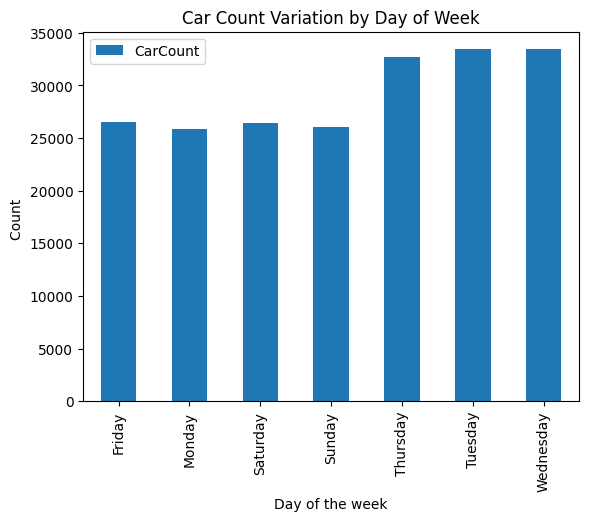

In [12]:
dow_count = df.loc[:, ['CarCount','BikeCount','BusCount','TruckCount','Total', 'Day of the week']].groupby('Day of the week').sum().reset_index()
dow_count_chart = dow_count.plot(kind = 'bar', x = 'Day of the week', y = 'CarCount', stacked = True, xlabel= 'Day of the week', ylabel = 'Count ', title = 'Car Count Variation by Day of Week')

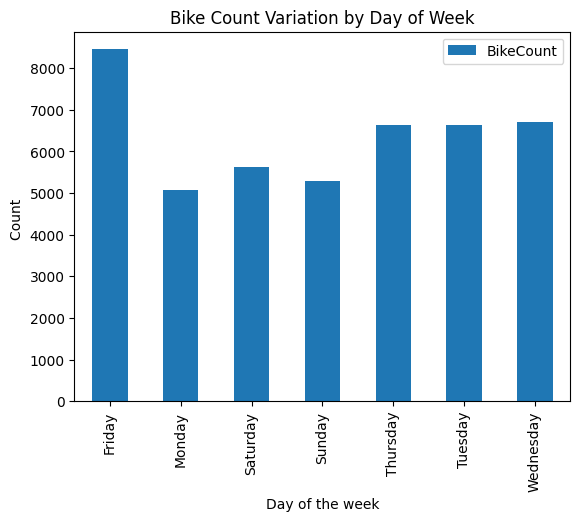

In [13]:
dow_count = df.loc[:, ['CarCount','BikeCount','BusCount','TruckCount','Total', 'Day of the week']].groupby('Day of the week').sum().reset_index()
dow_count_chart = dow_count.plot(kind = 'bar', x = 'Day of the week', y = 'BikeCount', stacked = True, xlabel= 'Day of the week', ylabel = 'Count ', title = 'Bike Count Variation by Day of Week')


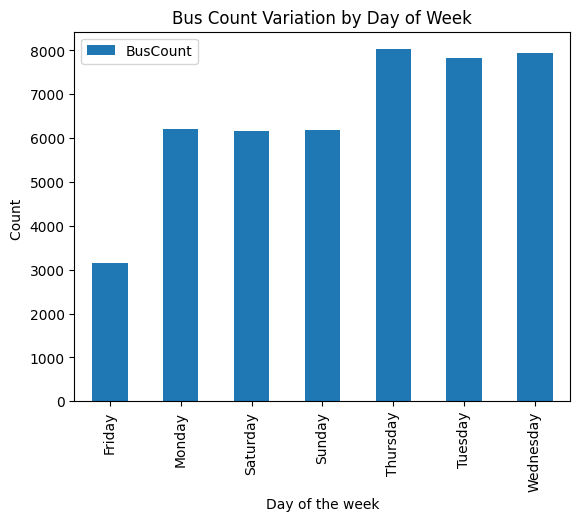

In [14]:
dow_count = df.loc[:, ['CarCount','BikeCount','BusCount','TruckCount','Total', 'Day of the week']].groupby('Day of the week').sum().reset_index()
dow_count_chart = dow_count.plot(kind = 'bar', x = 'Day of the week', y = 'BusCount', stacked = True, xlabel= 'Day of the week', ylabel = 'Count ', title = 'Bus Count Variation by Day of Week')


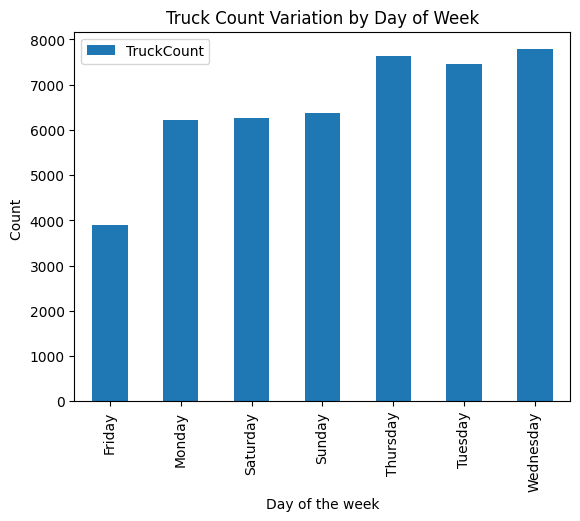

In [15]:
dow_count = df.loc[:, ['CarCount','BikeCount','BusCount','TruckCount','Total', 'Day of the week']].groupby('Day of the week').sum().reset_index()
dow_count_chart = dow_count.plot(kind = 'bar', x = 'Day of the week', y = 'TruckCount', stacked = True, xlabel= 'Day of the week', ylabel = 'Count ', title = 'Truck Count Variation by Day of Week')

### 4 Car count vs. Traffic Situation

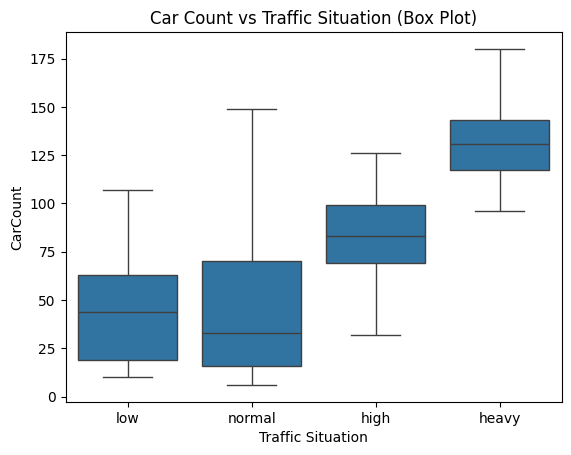

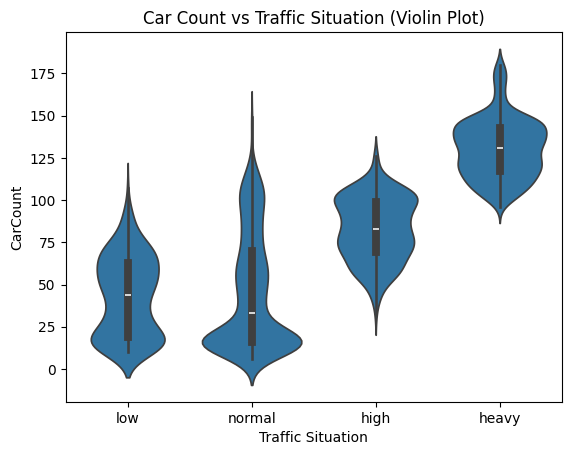

In [16]:
situation_order = ['low', 'normal', 'high', 'heavy']

df['Traffic Situation'] = pd.Categorical(df['Traffic Situation'], categories=situation_order, ordered=True)

sns.boxplot(x='Traffic Situation', y='CarCount', data=df)
plt.title('Car Count vs Traffic Situation (Box Plot)')
plt.show()
sns.violinplot(x='Traffic Situation', y='CarCount', data=df)
plt.title('Car Count vs Traffic Situation (Violin Plot)')
plt.show()

### 5 . Bike Count vs Traffic Situation

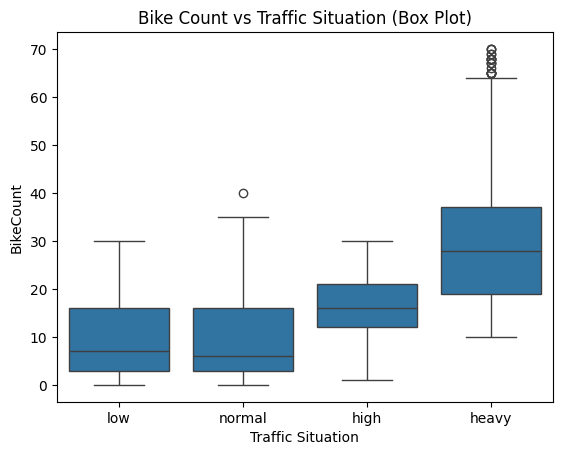

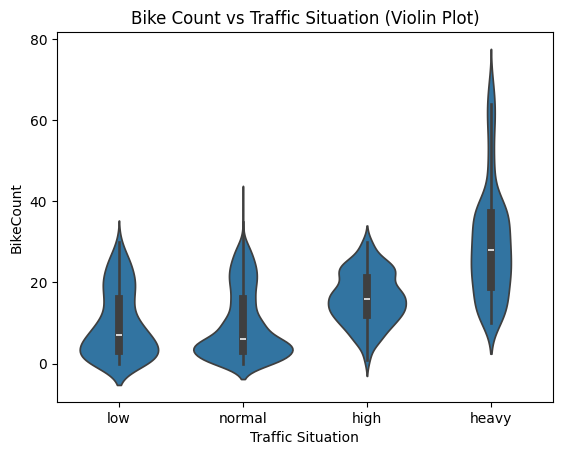

In [17]:
sns.boxplot(x='Traffic Situation', y='BikeCount', data=df)
plt.title('Bike Count vs Traffic Situation (Box Plot)')
plt.show()
sns.violinplot(x='Traffic Situation', y='BikeCount', data=df)
plt.title('Bike Count vs Traffic Situation (Violin Plot)')
plt.show()

### 6. Bus Count vs Traffic Situation

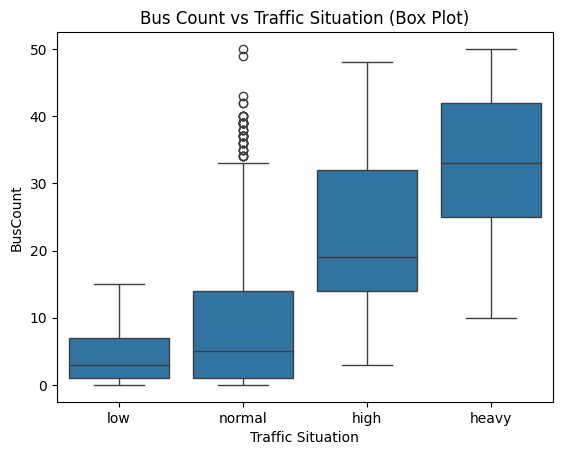

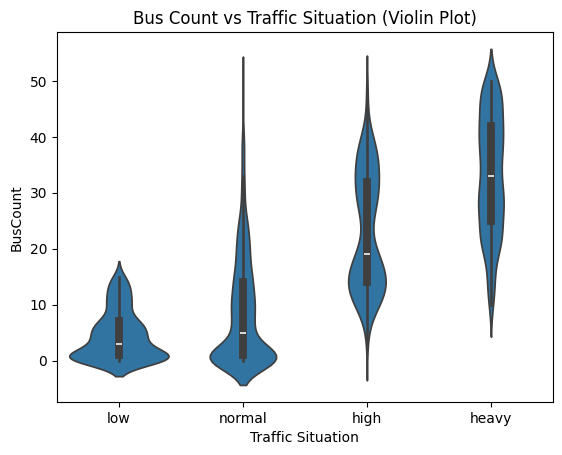

In [18]:
sns.boxplot(x='Traffic Situation', y='BusCount', data=df)
plt.title('Bus Count vs Traffic Situation (Box Plot)')
plt.show()
sns.violinplot(x='Traffic Situation', y='BusCount', data=df)
plt.title('Bus Count vs Traffic Situation (Violin Plot)')
plt.show()

### 7. Truck Count vs. Traffic Situation

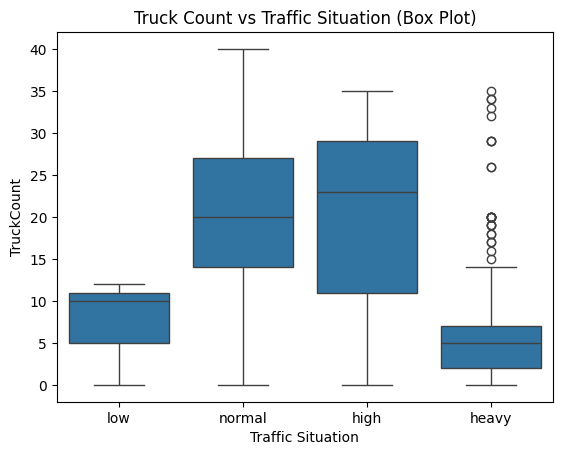

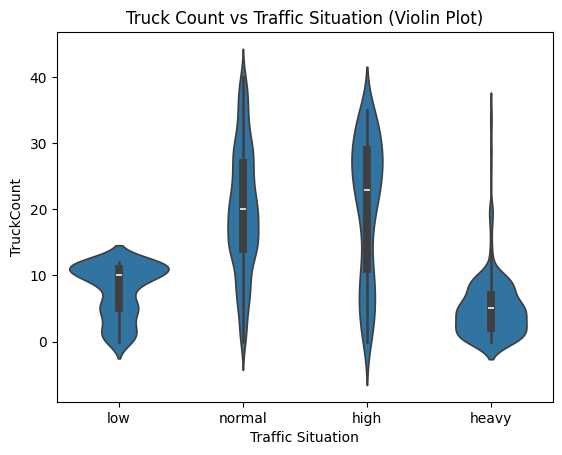

In [19]:
sns.boxplot(x='Traffic Situation', y='TruckCount', data=df)
plt.title('Truck Count vs Traffic Situation (Box Plot)')
plt.show()
sns.violinplot(x='Traffic Situation', y='TruckCount', data=df)
plt.title('Truck Count vs Traffic Situation (Violin Plot)')
plt.show()

### 8. Total Vehicle Count by Traffic Situation

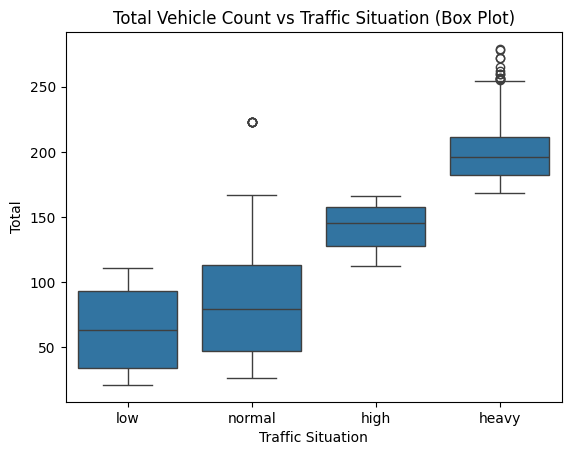

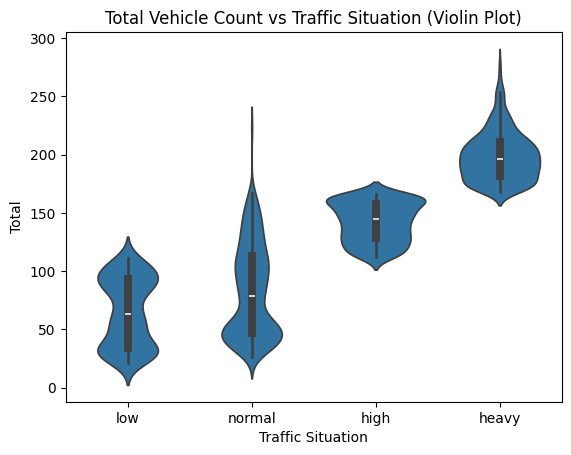

In [20]:
sns.boxplot(x='Traffic Situation', y='Total', data=df)
plt.title('Total Vehicle Count vs Traffic Situation (Box Plot)')
plt.show()
sns.violinplot(x='Traffic Situation', y='Total', data=df)
plt.title('Total Vehicle Count vs Traffic Situation (Violin Plot)')
plt.show()

#### 9. Busiest Hours of the Day

In [22]:
df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Hour,Hour Group
0,1900-01-01 00:00:00,10,Tuesday,31,0,4,4,39,low,0,0:00 - 1:00
1,1900-01-01 00:15:00,10,Tuesday,49,0,3,3,55,low,0,0:00 - 1:00
2,1900-01-01 00:30:00,10,Tuesday,46,0,3,6,55,low,0,0:00 - 1:00
3,1900-01-01 00:45:00,10,Tuesday,51,0,2,5,58,low,0,0:00 - 1:00
4,1900-01-01 01:00:00,10,Tuesday,57,6,15,16,94,normal,1,1:00 - 2:00
...,...,...,...,...,...,...,...,...,...,...,...
2971,1900-01-01 22:45:00,9,Thursday,16,3,1,36,56,normal,22,22:00 - 23:00
2972,1900-01-01 23:00:00,9,Thursday,11,0,1,30,42,normal,23,23:00 - 24:00
2973,1900-01-01 23:15:00,9,Thursday,15,4,1,25,45,normal,23,23:00 - 24:00
2974,1900-01-01 23:30:00,9,Thursday,16,5,0,27,48,normal,23,23:00 - 24:00


<ipython-input-23-ec33de84b923>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_traffic = df.groupby("Hour Group")['Total'].sum()


<Axes: title={'center': 'Busiest Hours of Day'}, xlabel='Hour Group', ylabel='Total Count'>

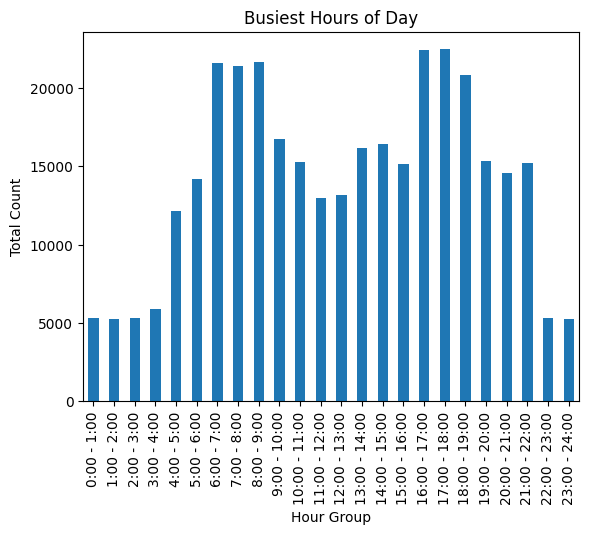

In [23]:
df['Time'] = pd.to_datetime(df['Time'], format = "%I:%M:%S %p")
df['Hour'] = df['Time'].dt.hour

#Defining bins for hourly grouping

hour_bins = list(range(0,25,1))
hour_labels = [f"{h}:00 - {h+1}:00" for h in range(24)]

#Apply pd.cut to categorize hours
df['Hour Group'] = pd.cut(df['Hour'], bins = hour_bins, labels = hour_labels, right = False)
hourly_traffic = df.groupby("Hour Group")['Total'].sum()

hourly_traffic.plot(kind = 'bar', x = 'Hour Group', y= 'Total', title = 'Busiest Hours of Day', xlabel='Hour Group', ylabel = 'Total Count')

**10**-Traffic Distrubtion by day of the week

In [24]:
traffic_mapping = {"low": 1, "medium": 2, "high": 3, "heavy": 4}
df["Traffic Numeric"] = df["Traffic Situation"].map(traffic_mapping)


<ipython-input-25-7aa2aede388d>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  traffic_counts = df.groupby(['Day of the week', 'Traffic Situation']).size().unstack()


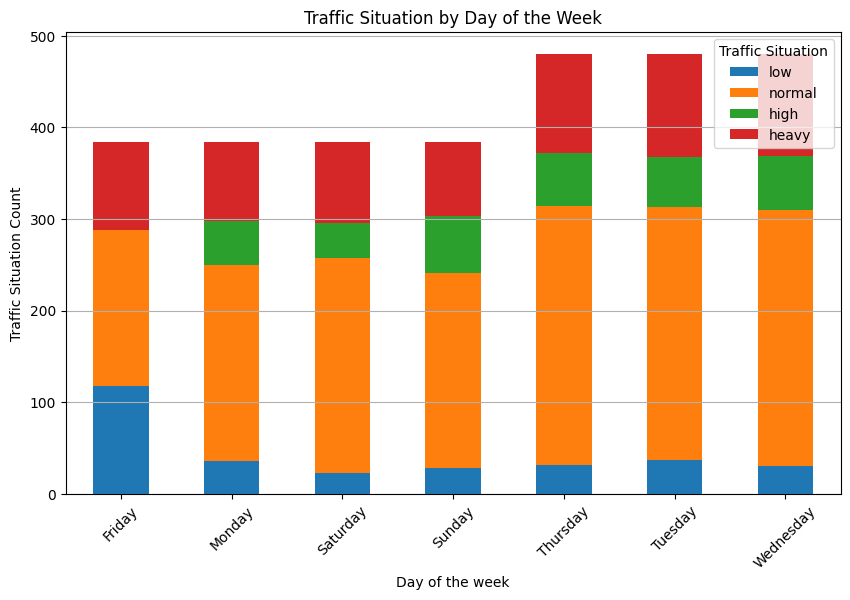

In [25]:
import matplotlib.pyplot as plt

# Group by 'Day of the week' and 'Traffic Situation' to count occurrences
traffic_counts = df.groupby(['Day of the week', 'Traffic Situation']).size().unstack()

# Plot
traffic_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xticks(rotation=45)
plt.xlabel('Day of the week')
plt.ylabel('Traffic Situation Count')
plt.title('Traffic Situation by Day of the Week')
plt.legend(title='Traffic Situation')
plt.grid(axis='y')
plt.show()


11- correlations between different vehicle types

<Axes: >

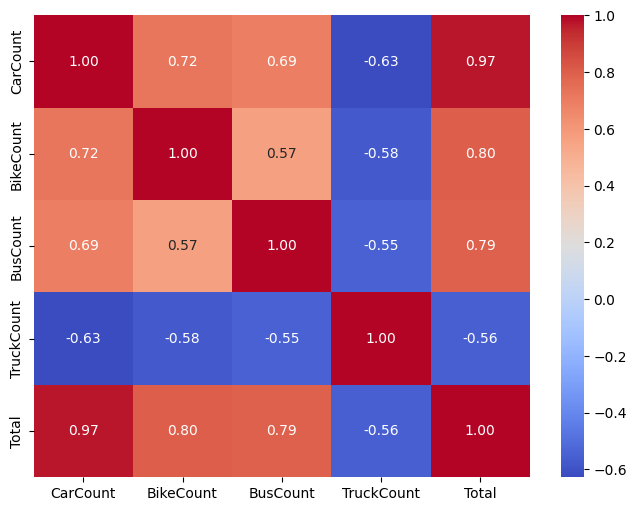

In [26]:
vehicle_columns = ["CarCount", "BikeCount", "BusCount", "TruckCount", "Total"]
corr_matrix = df[vehicle_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")

12- distribution of traffic situations differ by hour?

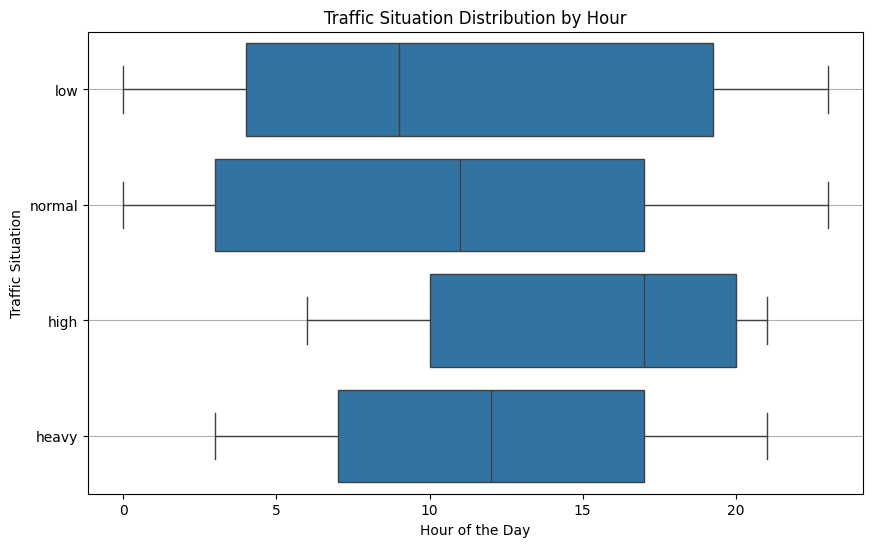

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Hour", y="Traffic Situation", data=df)

plt.xlabel("Hour of the Day")
plt.ylabel("Traffic Situation")
plt.title("Traffic Situation Distribution by Hour")
plt.grid(axis="y")
plt.show()

13- distribution of total vehicle counts for each day of the week

In [29]:
df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Hour,Hour Group,Traffic Numeric
0,1900-01-01 00:00:00,10,Tuesday,31,0,4,4,39,low,0,0:00 - 1:00,1.0
1,1900-01-01 00:15:00,10,Tuesday,49,0,3,3,55,low,0,0:00 - 1:00,1.0
2,1900-01-01 00:30:00,10,Tuesday,46,0,3,6,55,low,0,0:00 - 1:00,1.0
3,1900-01-01 00:45:00,10,Tuesday,51,0,2,5,58,low,0,0:00 - 1:00,1.0
4,1900-01-01 01:00:00,10,Tuesday,57,6,15,16,94,normal,1,1:00 - 2:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2971,1900-01-01 22:45:00,9,Thursday,16,3,1,36,56,normal,22,22:00 - 23:00,NaN
2972,1900-01-01 23:00:00,9,Thursday,11,0,1,30,42,normal,23,23:00 - 24:00,NaN
2973,1900-01-01 23:15:00,9,Thursday,15,4,1,25,45,normal,23,23:00 - 24:00,NaN
2974,1900-01-01 23:30:00,9,Thursday,16,5,0,27,48,normal,23,23:00 - 24:00,NaN


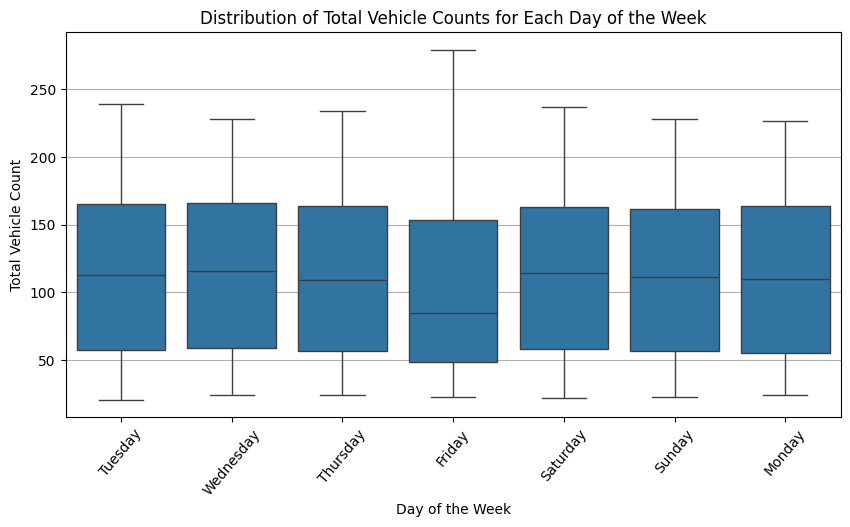

In [35]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Day of the week", y="Total", data=df)


plt.xticks(rotation=50)
plt.xlabel("Day of the Week")
plt.ylabel("Total Vehicle Count")
plt.title("Distribution of Total Vehicle Counts for Each Day of the Week")
plt.grid(axis="y")

plt.show()


14- variance in vehicle counts compare across vehicle types

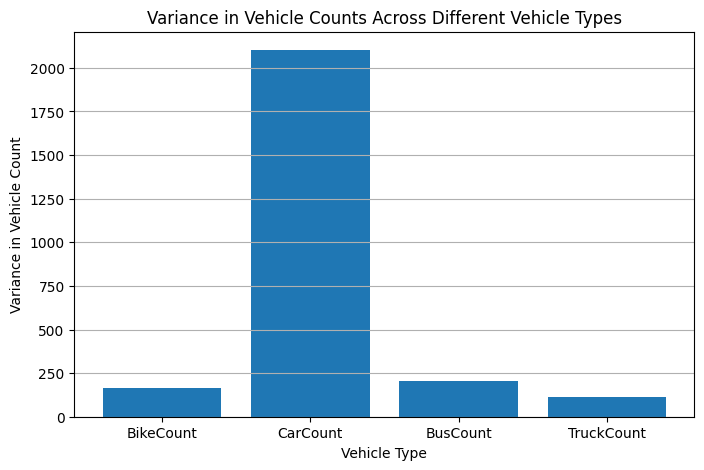

In [36]:
vehicle_columns = ["BikeCount", "CarCount", "BusCount", "TruckCount"]
variance_values = df[vehicle_columns].var()

plt.figure(figsize=(8, 5))
plt.bar(variance_values.index, variance_values.values)

plt.xlabel("Vehicle Type")
plt.ylabel("Variance in Vehicle Count")
plt.title("Variance in Vehicle Counts Across Different Vehicle Types")
plt.grid(axis="y")


plt.show()


15- average vehicle count for each type change over time?


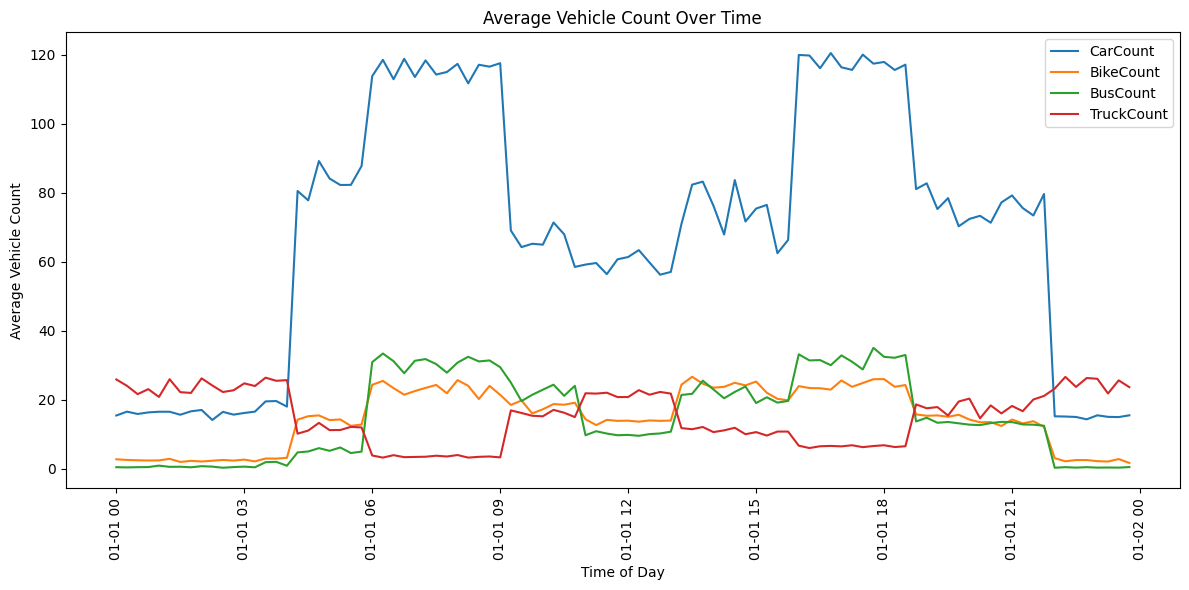

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
average_vehicle_counts = df.groupby('Time')[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']].mean()
plt.figure(figsize=(12, 6))
for column in ['CarCount', 'BikeCount', 'BusCount', 'TruckCount']:
    plt.plot(average_vehicle_counts.index, average_vehicle_counts[column], label=column)

plt.xlabel("Time of Day")
plt.ylabel("Average Vehicle Count")
plt.title("Average Vehicle Count Over Time")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()
